# 线性规划(Linear Programming)

## 范例1. 最大化目标函数

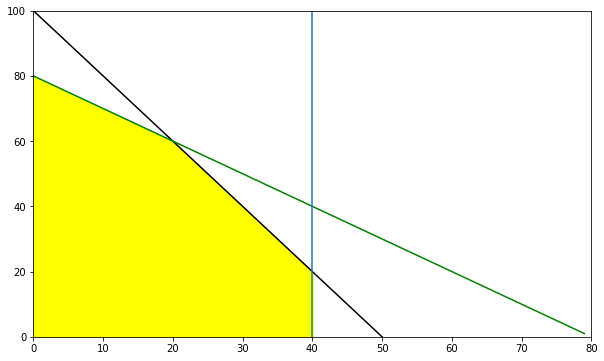

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# 限制式 2x+y = 100
x = np.arange(0,80)
y = 100 - 2 * x

# 限制式 x+y = 80
y_2 = 80 - x
plt.plot(x, y, 'black', x, y_2, 'g')

# 限制式 x = 40
plt.axvline(40)

# 座标轴范围
plt.xlim(0,80)
plt.ylim(0,100)

# 限制式 x+y = 80 取边界线样本点
x1 = np.arange(0,21)
y1 = 80 - x1

# 限制式 2x+y = 100 取边界线样本点
x2 = np.arange(20,41)
y2 = 100 - 2 * x2

# 限制式 x = 40 取边界线样本点
x3 = np.array([40]*20)
y3 = np.arange(0,20)

# 整合边界线样本点
x1 = np.concatenate((x1, x2, x3))
y1 = np.concatenate((y1, y2, y3))

# 可行解(Feasible Solutions)
plt.fill_between(x1, y1, color='yellow')

plt.show()

## 以套件 pulp 求解。

In [2]:
!pip install pulp

In [3]:
from pulp import LpMaximize, LpProblem, LpStatus, lpSum, LpVariable

# 设定题目名称及最大化(LpMaximize)或最小化(LpMinimize)
model  = LpProblem("范例1. 最大化目标函数", LpMaximize)

# 变数初始化， x >= 0, y >= 0
x = LpVariable(name="x", lowBound=0)
y = LpVariable(name="y", lowBound=0)

# 目标函数
objective_function = 3 * x + 2 * y

# 限制条件
constraint = 2 * x + 4 * y >= 8
model += (2 * x + y <= 100, "限制式1")
model += (x + y <= 80, "限制式2")
model += (x <= 40, "限制式3")

model += objective_function
model

C:\Users\Ariel\anaconda3\lib\site-packages\pulp\pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


范例1._最大化目标函数:
MAXIMIZE
3*x + 2*y + 0
SUBJECT TO
限制式1: 2 x + y <= 100

限制式2: x + y <= 80

限制式3: x <= 40

VARIABLES
x Continuous
y Continuous

In [4]:
status = model.solve()
status = 'yes' if status == 1 else 'no'
print(f'有解吗? {status}')

print(f"目标函数: {model.objective.value()}")
for var in model.variables():
    print(f"{var.name}: {var.value()}")
    
print(f'\n限制式的值(不太重要)')
for name, constraint in model.constraints.items():
    print(f"{name}: {constraint.value()}")    

有解吗? yes
目标函数: 180.0
x: 20.0
y: 60.0

限制式的值(不太重要)
限制式1: 0.0
限制式2: 0.0
限制式3: -20.0
